In [1]:
import numpy as np

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
data= pd.read_csv(r'C:\Users\Niloy\Dataset\MBA.csv',header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


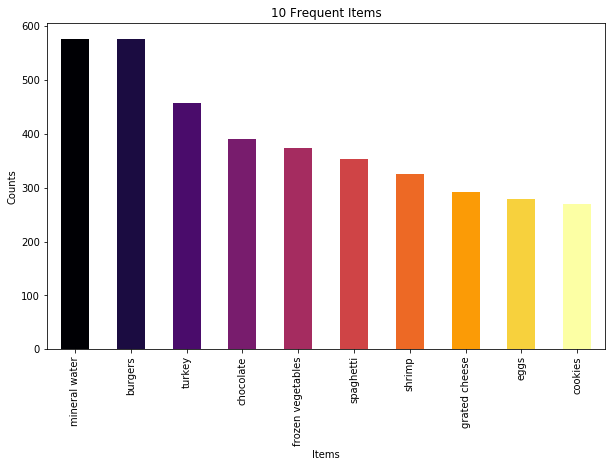

In [47]:
plt.rcParams['figure.figsize'] = (10,6)
color = plt.cm.inferno(np.linspace(0,1,10))
data[0].value_counts().head(10).plot.bar(color = color)
plt.title('10 Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.show()

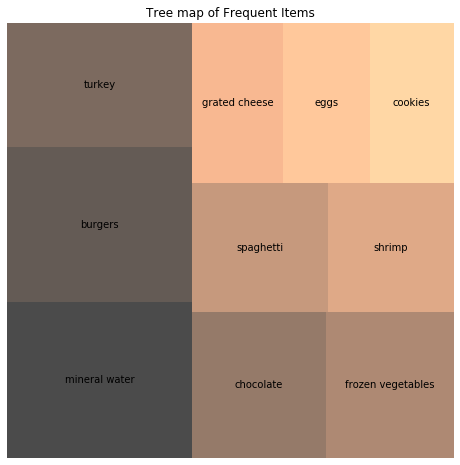

In [50]:
import squarify
plt.rcParams['figure.figsize']=(8,8)
Items = data[0].value_counts().head(10).to_frame()
size = Items[0].values
lab = Items.index
color = plt.cm.copper(np.linspace(0,1,10))
squarify.plot(sizes=size, label=lab, alpha = 0.7, color=color)
plt.title('Tree map of Frequent Items')
plt.axis('off')
plt.show()

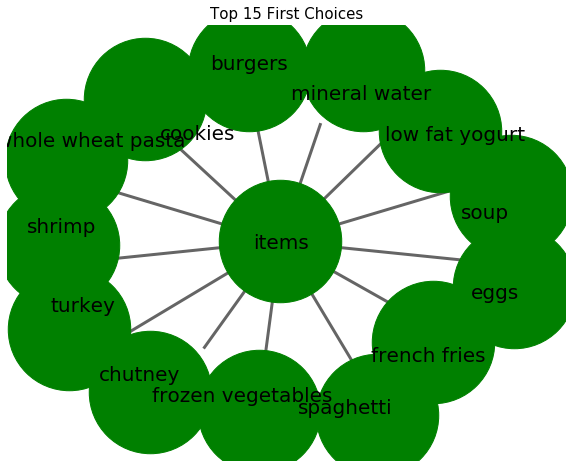

In [51]:
data['Items'] = 'items'
df = data.truncate(before=-1,after=15)

import networkx as nx

Items = nx.from_pandas_edgelist(df, source = 'Items', target = 0, edge_attr = True)

plt.rcParams['figure.figsize'] = (10,8)
nx.draw_networkx_nodes(G=Items,pos=nx.spring_layout(Items), node_size=15000,node_color='green')
nx.draw_networkx_edges(G=Items,pos=nx.spring_layout(Items), alpha=0.6, width=3 ,edge_color='black')
nx.draw_networkx_labels(G=Items,pos=nx.spring_layout(Items),font_size=20, font_family = 'sans-serif')
plt.axis('off')
plt.grid()
plt.title('Top 15 First Choices', fontsize = 15)
plt.show()

In [52]:
data.drop(columns='Items',axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
transactions = []
for i in range(0,7501):
    transactions.append([str(data.values[i,j]) for j in range(0,20)])

In [54]:
from mlxtend.preprocessing import TransactionEncoder
transac = TransactionEncoder()
dataset = transac.fit_transform(transactions)
dataset

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [55]:
df = pd.DataFrame(dataset, columns= transac.columns_)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,...,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,...,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [56]:
from mlxtend.frequent_patterns import apriori, association_rules
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))

In [57]:
frequent_itemsets.head(5)

,support,itemsets,length
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.004666,(asparagus),1
3,0.033329,(avocado),1
4,0.004533,(babies food),1


In [58]:
frequent_itemsets[frequent_itemsets['length'] >= 2].head(5)

,support,itemsets,length
116,0.005199,"(burgers, almonds)",2
117,0.003066,"(cake, almonds)",2
118,0.005999,"(chocolate, almonds)",2
119,0.006532,"(eggs, almonds)",2
120,0.004399,"(french fries, almonds)",2


In [59]:
frequent_itemsets[frequent_itemsets['length'] >= 3].head(5)

,support,itemsets,length
1017,0.005199,"(nan, burgers, almonds)",3
1018,0.003066,"(nan, cake, almonds)",3
1019,0.005999,"(chocolate, nan, almonds)",3
1020,0.006532,"(eggs, nan, almonds)",3
1021,0.004399,"(french fries, nan, almonds)",3


In [60]:
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
rules.head(5)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724
1,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089
2,(cake),(almonds),0.081056,0.020397,0.003066,0.037829,1.854607,0.001413,1.018117
3,(almonds),(cake),0.020397,0.081056,0.003066,0.150327,1.854607,0.001413,1.081527
4,(chocolate),(almonds),0.163845,0.020397,0.005999,0.036615,1.795099,0.002657,1.016834


In [61]:
rules[(rules['lift'] >= 5) & (rules['confidence'] >= 0.4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
8192,"(whole wheat pasta, mineral water)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145
15898,"(nan, whole wheat pasta, mineral water)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145
15905,"(whole wheat pasta, mineral water)","(olive oil, nan)",0.009599,0.065725,0.003866,0.402778,6.128268,0.003235,1.564368
